# TD exemple pour le ML en Python

### --> Ces étapes permettent de créer un pipeline complet en décomposant les différentes étapes clés : l'imputation des valeurs manquantes, la standardisation des données, l'entraînement du modèle, et l'évaluation des résultats. Vous pouvez facilement réutiliser ces étapes pour d'autres tâches de machine learning avec des modifications mineures selon les besoins.

## Mise en place de l'environnement

In [1]:
!pip install kaggle
!mkdir -p ~/.kaggle

In [2]:
# Pour cloner un dépôt GitHub entier
!git clone 'https://github.com/agodmer/UE-Medecine-IA-Omics'

Cloning into 'UE-Medecine-IA-Omics'...
remote: Enumerating objects: 162, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 162 (delta 67), reused 57 (delta 13), pack-reused 0
Receiving objects: 100% (162/162), 15.79 MiB | 23.32 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [3]:
# Pour télécharger un fichier spécifique depuis GitHub
!wget 'https://github.com/agodmer/UE-Medecine-IA-Omics/blob/main/Data/Breast_Cancer_Wisconsin.csv' -O nom_du_fichier

--2024-04-26 08:07:00--  https://github.com/agodmer/UE-Medecine-IA-Omics/blob/main/Data/Breast_Cancer_Wisconsin.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘nom_du_fichier’

nom_du_fichier          [ <=>                ] 272.13K  --.-KB/s    in 0.1s    

2024-04-26 08:07:01 (2.24 MB/s) - ‘nom_du_fichier’ saved [278661]



## Jeu de données "Breast Cancer Wisconsin" de Kaggle

## 1. Import des Bibliothèques

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Chargement et Prétraitement des Données

In [5]:
# Chargement du fichier CSV
df = pd.read_csv("/content/UE-Medecine-IA-Omics/Data/Breast_Cancer_Wisconsin.csv", sep=';')

# Visualisation des premières lignes
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

Dix valeurs réelles sont calculées pour chaque noyau cellulaire :

a) rayon (moyenne des distances entre le centre et les points du périmètre)

b) texture (écart-type des valeurs en niveaux de gris)

c) périmètre

d) surface

e) douceur (variation locale de la longueur des rayons)

f) compacité (périmètre^2 / surface - 1,0)

g) concavité (gravité des parties concaves du contour)

h) points concaves (nombre de parties concaves du contour)

i) symétrie

j) dimension fractale ("approximation du trait de côte" - 1)

## 3. Nettoyage des Données

Vérification de la présence de données manquantes ?

In [7]:
# Suppression des colonnes inutiles (si nécessaire)
# Exemple : si une colonne n'est pas utile pour la modélisation
# df = df.drop(columns=["id", "Unnamed: 32"], errors='ignore')

# Vérification des valeurs manquantes
print("Nombre de valeurs manquantes par colonne:")
print(df.isnull().sum())

Nombre de valeurs manquantes par colonne:
id                          0
diagnosis                   0
radius_mean                 3
texture_mean                4
perimeter_mean              5
area_mean                   4
smoothness_mean            20
compactness_mean           17
concavity_mean             16
concave points_mean         8
symmetry_mean              16
fractal_dimension_mean     12
radius_se                  11
texture_se                  2
perimeter_se                1
area_se                     9
smoothness_se              10
compactness_se              1
concavity_se               12
concave points_se           9
symmetry_se                13
fractal_dimension_se        7
radius_worst                9
texture_worst               5
perimeter_worst             9
area_worst                  3
smoothness_worst            2
compactness_worst           1
concavity_worst             2
concave points_worst        7
symmetry_worst              2
fractal_dimension_worst     

## 4. Division des Données en Entraînement et Test

In [9]:
# Séparer les caractéristiques (X) de la cible (y)
# Remarque : ajustez les noms de colonnes en fonction du fichier CSV
X = df.drop(columns=["diagnosis"])  # Toutes les caractéristiques
y = df["diagnosis"]  # La cible (diagnosis)

# Conversion des étiquettes en numériques
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convertit 'B' et 'M' en 0 et 1

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5.a Imputation des Valeurs Manquantes

In [10]:
from sklearn.impute import SimpleImputer

# Créer un imputer qui remplace les valeurs manquantes par la moyenne
imputer = SimpleImputer(strategy="mean")

# Appliquer l'imputer à l'ensemble d'entraînement
X_train_imputed = imputer.fit_transform(X_train)

# Appliquer l'imputer à l'ensemble de test (sans "fit" pour éviter des fuites de données)
X_test_imputed = imputer.transform(X_test)

## 5.b Standardisation des Données

In [11]:
from sklearn.preprocessing import StandardScaler

# Créer un scaler pour standardiser les caractéristiques
scaler = StandardScaler()

# Appliquer le scaler à l'ensemble d'entraînement
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Appliquer le scaler à l'ensemble de test
X_test_scaled = scaler.transform(X_test_imputed)

## 5.c Entraînement du Modèle

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Créer un modèle de Random Forest
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle avec l'ensemble d'entraînement
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## 6. Prédiction et Évaluation

Accuracy: 0.9707602339181286
Rapport de classification:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



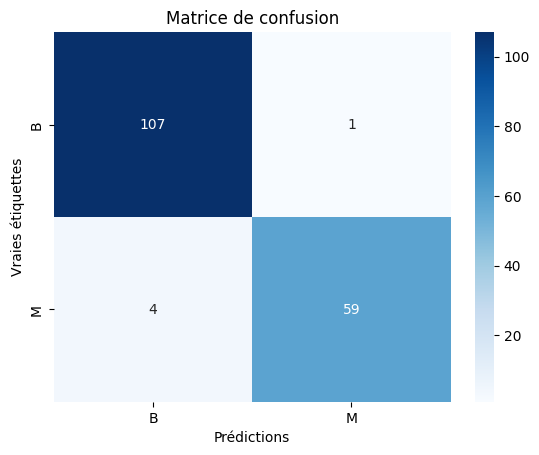

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prédire sur l'ensemble de test
y_pred = classifier.predict(X_test_scaled)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Afficher le rapport de classification
print("Rapport de classification:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.title("Matrice de confusion")
plt.show()